In [1]:
#Here I import the data libraries needed to break down the Trackman CSV files
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
#Here I import the Trackman CSV
Trackman = pd.read_csv("10-16-21_Cal#1.csv")


In [3]:
#Here I do a little bit of data cleaning and take out all non-defense pitches tracked
Trackman_Pitchers = Trackman.loc[Trackman["PitcherTeam"] == "GOL_PRA"]
Trackman_Pitchers

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
23,24,10/16/2021,13:40.8,1,1,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
24,25,10/16/2021,13:54.2,1,2,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
25,26,10/16/2021,14:08.9,1,3,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
26,27,10/16/2021,14:25.5,1,4,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
27,28,10/16/2021,14:43.2,1,5,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,10/16/2021,12:13.2,2,3,"Lake, Ben",1000074241,Right,GOL_PRA,"Valero, Cesar",...,-74.29677,10.87367,High,High,High,NaN,NaN,High,High,High
230,231,10/16/2021,12:45.9,3,1,"Lake, Ben",1000074241,Right,GOL_PRA,"Bacho, Dawson",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
231,232,10/16/2021,13:01.0,3,2,"Lake, Ben",1000074241,Right,GOL_PRA,"Bacho, Dawson",...,NaN,NaN,High,High,High,High,Medium,NaN,NaN,NaN
232,233,10/16/2021,13:47.5,4,1,"Lake, Ben",1000074241,Right,GOL_PRA,"Walker, Joshua",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN


In [4]:
#Here is where it gets a little more complex as we try to create an Effective Velocity (EV function)
#The first step we do is try to find the distance in miles by taking the pitching mound distance of 60'6 and
#subtracting the pitchers Extension for every pitch thrown.  We then divide this by 5280 to get to miles

#The next step is to find time, which is taken from the Zone Time, which is in seconds,
# and divided by 3600 to get hours

#This allows for us to use the velocity formula and get our adjusted velocity with extension, the first part of
# Effective Velocity

#The next step is about plate location and the impact that has on EV.  In order to do this we had to create
# a coefficient to represent the change in speed based on plate location.

#2.75mph is how much velocity is added or subtracted for every six
# inches depending on if it is away or in to a batter, We then  divide 2.75 by 6 to get a constant.  
# From there we take the height of the top of the zone which is 3.41 feet on average from our research, 
# and subtract it from the PlateLocHeight, or y.  We then take the length of  half of homeplate and divide
# it by 12 so that it is in feet instead of inches, and subtract PlateLocSide

#Finally we return the velocity plus the coefficient (which can be positive or negative)


def EV(df):
    x = df["PlateLocSide"]
    y = df["PlateLocHeight"]
    e = df["Extension"]
    t = df["ZoneTime"]
    side = df["BatterSide"]
    for a in x:
        for b in y:
            for c in e:
                for d in t:
                    for e in side:
                        num_miles = (60.5-c)/5280
                        num_hours = t/3600
                        v = num_miles/num_hours
                        coeff = 0
                        if e == "Right":
                            coeff = ((2.75/6)*(3.41-y))/(8.5/12-x)
                        elif e == "Left":
                            coeff = ((2.75/6)*(3.41-y))/(x-8.5/12)
                        return v + coeff

In [5]:
#Here we test the df
EV(Trackman_Pitchers)

23     87.821484
24     84.680151
25     81.043717
26     87.248211
27     88.747763
         ...    
229    77.973091
230    87.508933
231    77.497255
232    89.894868
233    87.417054
Length: 124, dtype: float64

In [6]:
# Here we apply the function to get an array of EV's that match up with our data set.
Trackman_Pitchers["EV"] = EV(Trackman_Pitchers)      

/Users/kelvinervais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
Trackman_Pitchers.dropna(axis=1).columns

Index(['PitchNo', 'Date', 'Time', 'PAofInning', 'PitchofPA', 'Pitcher',
       'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter', 'BatterId',
       'BatterSide', 'BatterTeam', 'PitcherSet', 'Inning', 'Top/Bottom',
       'Outs', 'Balls', 'Strikes', 'TaggedPitchType', 'AutoPitchType',
       'PitchCall', 'KorBB', 'TaggedHitType', 'PlayResult', 'OutsOnPlay',
       'RunsScored', 'RelSpeed', 'VertRelAngle', 'HorzRelAngle', 'SpinRate',
       'SpinAxis', 'Tilt', 'RelHeight', 'RelSide', 'Extension', 'VertBreak',
       'InducedVertBreak', 'HorzBreak', 'PlateLocHeight', 'PlateLocSide',
       'ZoneSpeed', 'VertApprAngle', 'HorzApprAngle', 'ZoneTime', 'pfxx',
       'pfxz', 'x0', 'y0', 'z0', 'vx0', 'vy0', 'vz0', 'ax0', 'ay0', 'az0',
       'HomeTeam', 'AwayTeam', 'Stadium', 'Level', 'League', 'GameID',
       'PitchUID', 'EffectiveVelo', 'SpeedDrop', 'GameUID', 'UTCDate',
       'UTCTime', 'LocalDateTime', 'UTCDateTime', 'System',
       'HomeTeamForeignID', 'Catcher', 'CatcherId', 'Catc

In [8]:
# Now we create a pivot table in order to get the average metrics by pitch type for each individual pitcher
metric_pivot_table = pd.pivot_table(Trackman_Pitchers, values='EV', index="Pitcher",
                    columns=['AutoPitchType'], aggfunc=np.mean)
metric_pivot_table.head()

AutoPitchType,Changeup,Curveball,Cutter,Four-Seam,Sinker,Slider
Pitcher,,,,,,
"Lake, Ben",NaN,NaN,88.006765,87.943798,NaN,77.735173
"Mack, Connor",81.366160,73.076046,NaN,89.220946,88.370740,80.253258
"Stoutenborough, Sam",72.178413,75.180577,NaN,87.273369,86.957697,80.690351
"Villers, Ian",86.790479,70.561262,NaN,85.894580,NaN,NaN


In [153]:
#Here I create the pitch_dif function which I then ran for every pitcher to get the differences 
#for the presentation
#def pitch_dif(pitcher):
    
#    FB_EV_Arr = EV_table.where("Pitcher", pitcher).column("Fastball")
#    FB_RelSpeed_Arr = Rel_Speed.where("Pitcher", pitcher).column("Fastball")
 #   FB_dif = FB_EV_Arr - FB_RelSpeed_Arr
#
 #   CH_EV_Arr = EV_table.where("Pitcher", pitcher).column("ChangeUp")
  #  CH_RelSpeed_Arr = Rel_Speed.where("Pitcher", pitcher).column("ChangeUp")
   # CH_dif = CH_EV_Arr - CH_RelSpeed_Arr
#
 #   SL_EV_Arr = EV_table.where("Pitcher", pitcher).column("Slider")
  #  SL_RelSpeed_Arr = Rel_Speed.where("Pitcher", pitcher).column("Slider")
   # SL_dif = SL_EV_Arr - SL_RelSpeed_Arr        
#
 #   CB_EV_Arr = EV_table.where("Pitcher", pitcher).column("Curveball")
  #  CB_RelSpeed_Arr = Rel_Speed.where("Pitcher", pitcher).column("Curveball")
   # CB_dif = CB_EV_Arr - CB_RelSpeed_Arr
    #return ("FB", FB_dif[0], "CH", CH_dif[0], "SL", SL_dif[0], "CB", CB_dif[0])
#pitch_dif("Lake, Ben")

In [154]:
#Here I create a simple Bauer unit calculator to use
def bauer(spin, velo):
    return spin/velo
Trackman_Pitchers["Bauer Units"] = Trackman_Pitchers["SpinRate"]/Trackman_Pitchers["RelSpeed"]
Trackman_Pitchers

/Users/kelvinervais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,EV,Bauer Units
23,24,10/16/2021,13:40.8,1,1,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,High,High,High,NaN,NaN,NaN,NaN,NaN,87.821484,24.468042
24,25,10/16/2021,13:54.2,1,2,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,High,High,High,NaN,NaN,NaN,NaN,NaN,84.680151,21.946323
25,26,10/16/2021,14:08.9,1,3,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,High,High,High,NaN,NaN,NaN,NaN,NaN,81.043717,29.114946
26,27,10/16/2021,14:25.5,1,4,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,High,High,High,NaN,NaN,NaN,NaN,NaN,87.248211,23.902765
27,28,10/16/2021,14:43.2,1,5,"Stoutenborough, Sam",1000016614,Right,GOL_PRA,"Torres, Keith",...,High,High,High,NaN,NaN,NaN,NaN,NaN,88.747763,21.629609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,10/16/2021,12:13.2,2,3,"Lake, Ben",1000074241,Right,GOL_PRA,"Valero, Cesar",...,High,High,High,NaN,NaN,High,High,High,77.973091,27.272702
230,231,10/16/2021,12:45.9,3,1,"Lake, Ben",1000074241,Right,GOL_PRA,"Bacho, Dawson",...,High,High,High,NaN,NaN,NaN,NaN,NaN,87.508933,18.871459
231,232,10/16/2021,13:01.0,3,2,"Lake, Ben",1000074241,Right,GOL_PRA,"Bacho, Dawson",...,High,High,High,High,Medium,NaN,NaN,NaN,77.497255,27.101502
232,233,10/16/2021,13:47.5,4,1,"Lake, Ben",1000074241,Right,GOL_PRA,"Walker, Joshua",...,High,High,High,NaN,NaN,NaN,NaN,NaN,89.894868,19.765326


In [155]:
import anvil.server
anvil.server.connect("KYBIJ76HYXRTQIIVX6YC5OI7-YIYMZQ3DO2AKOEG7")

In [123]:
metric_pivot_table = pd.pivot_table(Trackman_Pitchers, values= "EV",  index="Pitcher",
                    columns=['AutoPitchType'], aggfunc=np.mean)
metric_pivot_table["PitcherName"] = metric_pivot_table.index
metric_pivot_table

AutoPitchType,Changeup,Curveball,Cutter,Four-Seam,Sinker,Slider,PitcherName
Pitcher,,,,,,,
"Lake, Ben",NaN,NaN,88.006765,87.943798,NaN,77.735173,"Lake, Ben"
"Mack, Connor",81.366160,73.076046,NaN,89.220946,88.370740,80.253258,"Mack, Connor"
"Stoutenborough, Sam",72.178413,75.180577,NaN,87.273369,86.957697,80.690351,"Stoutenborough, Sam"
"Villers, Ian",86.790479,70.561262,NaN,85.894580,NaN,NaN,"Villers, Ian"


AutoPitchType,Changeup,Curveball,Cutter,Four-Seam,Sinker,Slider,PitcherName
Pitcher,,,,,,,
"Lake, Ben",NaN,NaN,88.006765,87.943798,NaN,77.735173,"Lake, Ben"
"Mack, Connor",81.366160,73.076046,NaN,89.220946,88.370740,80.253258,"Mack, Connor"
"Stoutenborough, Sam",72.178413,75.180577,NaN,87.273369,86.957697,80.690351,"Stoutenborough, Sam"
"Villers, Ian",86.790479,70.561262,NaN,85.894580,NaN,NaN,"Villers, Ian"


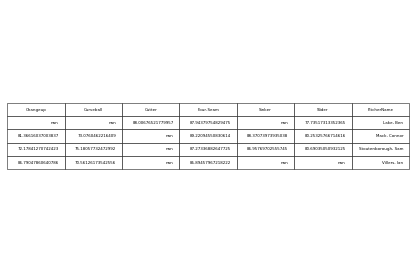

<bound method DataFrame.to_dict of AutoPitchType         Changeup  Curveball     Cutter  Four-Seam     Sinker  \
Pitcher                                                                      
Lake, Ben                  NaN        NaN  88.006765  87.943798        NaN   
Mack, Connor         81.366160  73.076046        NaN  89.220946  88.370740   
Stoutenborough, Sam  72.178413  75.180577        NaN  87.273369  86.957697   
Villers, Ian         86.790479  70.561262        NaN  85.894580        NaN   

AutoPitchType           Slider  
Pitcher                         
Lake, Ben            77.735173  
Mack, Connor         80.253258  
Stoutenborough, Sam  80.690351  
Villers, Ian               NaN  >

In [156]:
import pandas as pd
import dataframe_image as dfi
 
df = metric_pivot_table
 
dfi.export(df, 'dataframe.png')

In [ ]:
import numpy as np
import anvil.media
import pandas as pd
import matplotlib.pyplot as plt
import anvil.mpl_util

@anvil.server.callable
def breakdownTrackman(file):
    with anvil.media.TempFile(file) as filename:
        df = pd.read_csv(file)
        def EV(df):
            x = df["PlateLocSide"]
            y = df["PlateLocHeight"]
            e = df["Extension"]
            t = df["ZoneTime"]
            side = df["BatterSide"]
            for a in x:
                for b in y:
                    for c in e:
                        for d in t:
                            for e in side:
                                num_miles = (60.5-c)/5280
                                num_hours = t/3600
                                v = num_miles/num_hours
                                coeff = 0
                                if e == "Right":
                                    coeff = ((2.75/6)*(3.41-y))/(8.5/12-x)
                                elif e == "Left":
                                    coeff = ((2.75/6)*(3.41-y))/(x-8.5/12)
                                return v + coeff
        df["EV"] = EV(df)  
        df["Bauer Units"] = df["SpinRate"]/df["RelSpeed"]
        metric_pivot_table = pd.pivot_table(df, values=['EV',"RelSpeed","SpinRate","Bauer Units"],  index="Pitcher",
                    columns=['AutoPitchType'], aggfunc=np.mean)
        fig, ax = plt.subplots()

        # hide axes
        fig.patch.set_visible(False)
        ax.axis('off')
        ax.axis('tight')

        ax.table(cellText=df.values, colLabels=df.columns, loc='center')

        fig.tight_layout()
        return anvil.mpl_util.plot_image()